In [2]:
"""Plot the compound nerve action potential (CNAP).

The recorded SFAPs are produced for every fiber when a model contains a
recording cuff, identified within the model.json configuration file. The user
may pass in specific fiber indices or choose to compound across all fibers.

The copyrights of this software are owned by Duke University.
Please refer to the LICENSE and README.md files for licensing instructions.
The source code can be found on the following GitHub repository: https://github.com/wmglab-duke/ascent.
"""

import os
import sys

import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.sep.join([os.getcwd(), '']))
from src.core.query import Query  # noqa E402

sns.set_style("whitegrid")

fiber_indices = list(range(13))
print(fiber_indices)

q = Query(
    {
        'partial_matches': False,
        'include_downstream': True,
        'indices': {'sample': [0], 'model': [0], 'sim': [0]},
    }
).run()
data = q.sfap_data(fiber_indices, all_fibers=True, amplitudes=list(range(14)))


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [3]:
for amp in range(14):
    cnap = data.groupby(['fiber', 'SFAP_times'])[f'SFAP{amp}'].sum().reset_index()
    cnap = cnap.groupby('SFAP_times')[f'SFAP{amp}'].sum().reset_index()
    plt.figure()
    plt.plot(cnap['SFAP_times'], cnap[f'SFAP{amp}'])
    plt.xlabel('Time (ms)')
    plt.ylabel(f'Amplitude {amp}')
    plt.show()


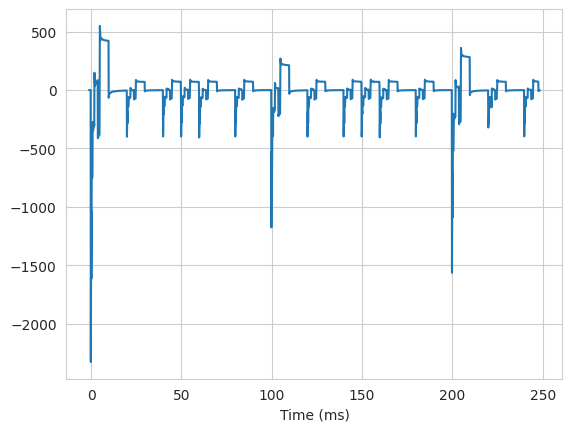